In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_frame = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')

In [3]:
data_frame.describe(include = 'all')

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [4]:
column_names = {'X1': 'Relative Compactness',
                'X2': 'Surface Area',
                'X3': 'Wall Area',
                'X4': 'Roof Area',
                'X5': 'Overall Height',
                'X6': 'Orientation',
                'X7': 'Glazing Area',
                'X8': 'Glazing Area Distribution',
                'Y1': 'Heating Load',
                'Y2': 'Cooling Load'
}
data_frame = data_frame.rename(columns = column_names)

In [5]:
data_frame.isnull().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

In [6]:
simple_linear_reg_data_frame = data_frame[['Relative Compactness', 'Heating Load']].sample(15, random_state = 2)
print(simple_linear_reg_data_frame)

     Relative Compactness  Heating Load
158                  0.82         24.17
251                  0.86         26.45
631                  0.90         34.29
757                  0.66         14.92
689                  0.79         41.73
573                  0.62         17.17
553                  0.74         14.61
728                  0.86         32.31
183                  0.66         11.61
515                  0.69         12.47
460                  0.71         12.36
143                  0.62         13.04
258                  0.79         36.77
682                  0.86         32.15
62                   0.82         23.54


In [7]:
simple_linear_reg_cool_data_frame = data_frame[['Relative Compactness', 'Cooling Load']].sample(15, random_state = 2)

In [8]:
print(simple_linear_reg_cool_data_frame)

     Relative Compactness  Cooling Load
158                  0.82         25.35
251                  0.86         31.28
631                  0.90         33.31
757                  0.66         17.79
689                  0.79         47.59
573                  0.62         17.21
553                  0.74         17.25
728                  0.86         29.69
183                  0.66         13.83
515                  0.69         14.60
460                  0.71         14.67
143                  0.62         14.24
258                  0.79         43.14
682                  0.86         36.21
62                   0.82         24.61


<AxesSubplot:xlabel='Relative Compactness', ylabel='Heating Load'>

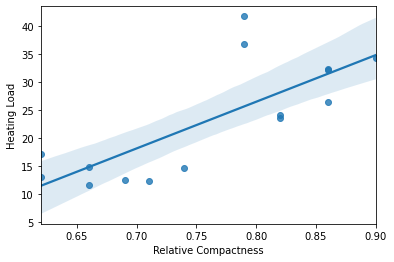

In [9]:
sns.regplot(x = 'Relative Compactness', y = 'Heating Load', data = simple_linear_reg_data_frame)

<AxesSubplot:xlabel='Relative Compactness', ylabel='Cooling Load'>

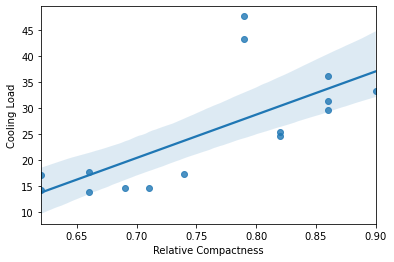

In [10]:
sns.regplot(x = 'Relative Compactness', y = 'Cooling Load', data = simple_linear_reg_cool_data_frame)

In [12]:
data_frame.corr()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
Relative Compactness,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,0.000000,1.283986e-17,1.764620e-17,0.622272,0.634339
Surface Area,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,0.000000,1.318356e-16,-3.558613e-16,-0.658120,-0.672999
Wall Area,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,0.000000,-7.969726e-19,0.000000e+00,0.455671,0.427117
Roof Area,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,0.000000,-1.381805e-16,-1.079129e-16,-0.861828,-0.862547
Overall Height,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,0.000000,1.861418e-18,0.000000e+00,0.889430,0.895785
Orientation,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,-0.002587,0.014290
Glazing Area,1.283986e-17,1.318356e-16,-7.969726e-19,-1.381805e-16,1.861418e-18,0.000000,1.000000e+00,2.129642e-01,0.269842,0.207505
Glazing Area Distribution,1.764620e-17,-3.558613e-16,0.000000e+00,-1.079129e-16,0.000000e+00,0.000000,2.129642e-01,1.000000e+00,0.087368,0.050525
Heating Load,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-0.002587,2.698417e-01,8.736846e-02,1.000000,0.975862
Cooling Load,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,0.014290,2.075050e-01,5.052512e-02,0.975862,1.000000
